In [1]:
print('Participant Details\n')
print('JAHFAITH IROKANULO\nKaggle.com/jahfaith\nKaggleId: Irokanulo Jahfaith\nGraduate, Bsc(Econs)\nMale\nDSN AI+Club')

Participant Details

JAHFAITH IROKANULO
Kaggle.com/jahfaith
KaggleId: Irokanulo Jahfaith
Graduate, Bsc(Econs)
Male
DSN AI+Club


In [2]:
# Importing relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the training data.

train = pd.read_csv('C:\\Users\\hp\\Desktop\\IntercampusAI\\train.csv')
train.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0


In [4]:
train.shape

(38312, 19)

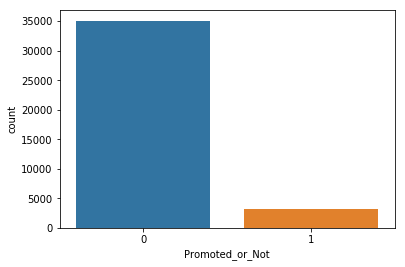

In [5]:
# Checking for the count of unique target characters (checking for target variable balance).

sns.countplot(train['Promoted_or_Not'])

In [6]:
# Checking for the exact frequency,
train['Promoted_or_Not'].value_counts()

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64

In [7]:
# There is a high degree of imbalance in the data.
# This will be treated by applying a sampling technique on the dataset.

In [8]:
# Info about the dataset.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [9]:
# Checking for unique characters in the feature.

train.Qualification.unique()

array(['MSc, MBA and PhD', 'First Degree or HND', nan,
       'Non-University Education'], dtype=object)

In [10]:
# Grouping characters in the Qualification column.

train.loc[train['Qualification'] == 'First Degree or HND', 'Qualification'] = 'Graduate'
train.loc[train['Qualification'] == 'MSc, MBA and PhD', 'Qualification'] = 'Post_Graduate'
train.loc[train['Qualification'] == 'Non-University Education', 'Qualification'] = 'Non_Graduate'

In [11]:
# Checking for unique characters after grouping.

train.Qualification.unique()

array(['Post_Graduate', 'Graduate', nan, 'Non_Graduate'], dtype=object)

In [12]:
# Unique character frequency in the feature

train.Qualification.value_counts()

Graduate         25578
Post_Graduate    10469
Non_Graduate       586
Name: Qualification, dtype: int64

In [13]:
# Number of missing values in Qualification column.

train.Qualification.isna().sum()

1679

In [14]:
# Filling the missing values in the categorical features.
# Creating a function.

def replace_most_common(x): 
    if pd.isnull(x):
        return 'not-specified'
    else:
        return x

In [15]:
# Replacing 'nan' with an editable character ('not_specified)

train.Qualification = train.Qualification.map(replace_most_common)
train.Qualification.unique()

array(['Post_Graduate', 'Graduate', 'not-specified', 'Non_Graduate'],
      dtype=object)

In [16]:
train.Qualification.value_counts()

Graduate         25578
Post_Graduate    10469
not-specified     1679
Non_Graduate       586
Name: Qualification, dtype: int64

In [17]:
# Assigning the values of 'not-specified' to the character with the highest frequency (Graduate).

train.Qualification.replace({'not-specified':'Graduate'}, inplace=True)
train.Qualification.value_counts()

Graduate         27257
Post_Graduate    10469
Non_Graduate       586
Name: Qualification, dtype: int64

In [18]:
train.Qualification.isna().sum()

0

In [19]:
# Checking for unique states.

train.State_Of_Origin.unique()

array(['ANAMBRA', 'KATSINA', 'NIGER', 'AKWA IBOM', 'ENUGU', 'OYO',
       'LAGOS', 'ONDO', 'KWARA', 'EDO', 'BAUCHI', 'TARABA', 'RIVERS',
       'KADUNA', 'PLATEAU', 'EKITI', 'BORNO', 'IMO', 'CROSS RIVER',
       'KANO', 'FCT', 'OGUN', 'GOMBE', 'DELTA', 'BENUE', 'ZAMFARA',
       'OSUN', 'ABIA', 'KEBBI', 'ADAMAWA', 'NASSARAWA', 'SOKOTO', 'KOGI',
       'JIGAWA', 'BAYELSA', 'YOBE', 'EBONYI'], dtype=object)

In [20]:
# Creating a function to summarize/group State_Of_Origin into Geo-political zones.

def state(x):
    
    south_east = ['ABIA', 'ANAMBRA', 'EBONYI', 'ENUGU', 'IMO', '']
    south_south = ['AKWA IBOM', 'EDO', 'RIVERS', 'CROSS RIVER', 'DELTA', 'BAYELSA']
    south_west = ['OYO', 'LAGOS', 'ONDO', 'EKITI', 'OGUN', 'OSUN']
    north_weast = ['KATSINA', 'BAUCHI', 'ZAMFARA', 'TARABA', 'KADUNA', 'BORNO', 'KANO', 'GOMBE', 'KEBBI', 'NASSARAWA', 'ADAMAWA', 'SOKOTO', 'YOBE', 'JIGAWA']
    north_central = ['NIGER', 'PLATEAU', 'FCT', 'BENUE', 'KOGI', 'KWARA']
    #north_weast is a combination of north west and north eastern states.
    
    if x in south_east:
        return 'south_east'
    if x in south_south:
        return 'south_south'
    if x in south_west:
        return 'south_west'
    if x in north_weast:
        return 'north_weast'
    if x in north_central:
        return 'north_central'

In [21]:
# Applying the function.

train.State_Of_Origin = train.State_Of_Origin.map(state)
train.State_Of_Origin.value_counts()

south_west       12273
north_weast       8296
south_south       6567
north_central     5871
south_east        5305
Name: State_Of_Origin, dtype: int64

Text(0,0.5,'Promotion status')

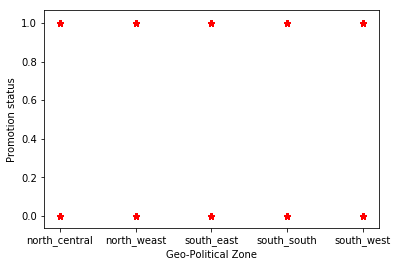

In [22]:
# Visualizing Geopolitical zone of staff and Promotion status.

plt.scatter(train['State_Of_Origin'], train['Promoted_or_Not'], c='r', marker='*')
plt.xlabel('Geo-Political Zone')
plt.ylabel('Promotion status')

In [23]:
# The above plot shows that there are members of staff from each geo-political zone that have been promoted and that are yet to be promoted.

In [24]:
# Plotting possible biases along the lines of tribe/state, gender, foreign schooled, and qualification.

In [25]:
# Creating a histogram function.

def histogram(x,y):
    plt.hist(list(x[y==0]), color='r', label='Not_Promoted')
    plt.hist(list(x[y==1]), color='b', label='Promoted')
    plt.title('Histogram of {var_name} by Promotion Status'.format(var_name='Selected independent variable'))
    plt.xlabel('{value}'.format(value='Independent variable'))
    plt.ylabel('frequency')
    plt.legend(loc='upper right')

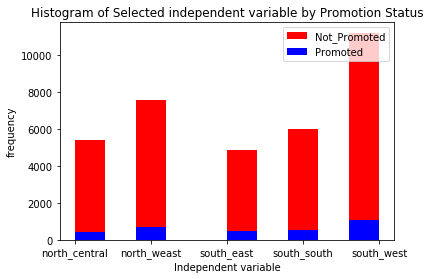

In [26]:
# Checking State_Of_Origin bias.

histogram(train.State_Of_Origin, train.Promoted_or_Not)

In [27]:
# According to the histogram above,
# South_west has the most number of promoted and unpromoted staff in the company.
#This may be due to the fact that they have the largest staff population in the company.  

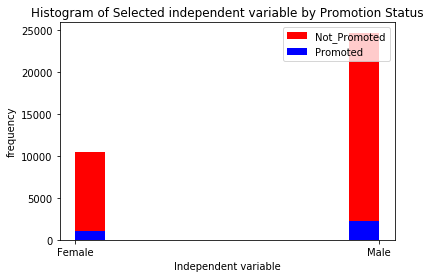

In [28]:
# Checking Gender bias.

histogram(train.Gender, train.Promoted_or_Not)

In [29]:
# The histogram shows that:
# There are more males than females in the firm.
# There are also more promoted and unpromoted males than females.

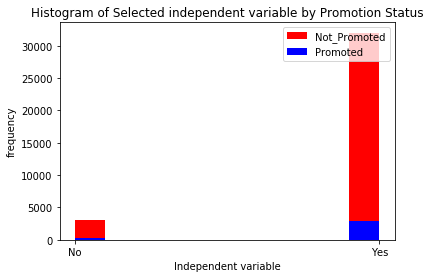

In [30]:
# Checking for bias based on local or International Qualification.

histogram(train.Foreign_schooled, train.Promoted_or_Not)

In [31]:
# According to the graph,
# Preference is given to individuals with foreign qualification.
# There are also more promoted staffs with foreign qualification than staffs with local qualification.

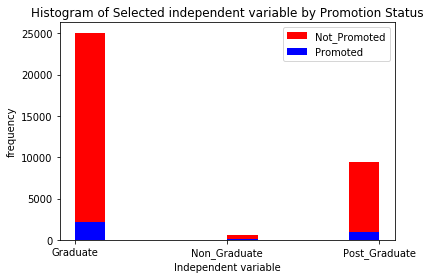

In [32]:
# Checking Qualification bias.

histogram(train.Qualification, train.Promoted_or_Not)

In [33]:
# There are more promoted first degree graduates than post graduates.
# This may be as a result of other factors such as; years of experience on the job, target met, performance score etc.
# The chances of promotion is very slim for non grauates in the firm.

In [34]:
train.head(1)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,Post_Graduate,Female,Direct Internal process,2,1986,12.5,2011,1,0,41,south_east,No,Married,No,No,0,0


In [35]:
# Summarizing/grouping Division into three departments.

train.Division.value_counts()

Commercial Sales and Marketing                 11695
Customer Support and Field Operations           7973
Sourcing and Purchasing                         5052
Information Technology and Solution Support     4952
Information and Strategy                        3721
Business Finance Operations                     1786
People/HR Management                            1704
Regulatory and Legal services                    733
Research and Innovation                          696
Name: Division, dtype: int64

In [36]:
# Unique count of Recruitment channels.

train.Channel_of_Recruitment.value_counts()

Agency and others                  21310
Direct Internal process            16194
Referral and Special candidates      808
Name: Channel_of_Recruitment, dtype: int64

In [37]:
# Unique count of Marital status.

train.Marital_Status.value_counts()

Married     31022
Single       6927
Not_Sure      363
Name: Marital_Status, dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [39]:
# In the data info above, 'no of previous employers' is regarded as an object data type instead of an integer.
# We therefore, investigate the feature.

train.No_of_previous_employers.value_counts()

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

In [40]:
# FEATURE ENGINEERING

In [41]:
# From the investigation, we found a string('more than 5') amidst integers.
# We therefore convert the string to an integer by assigning an integer to all positions in the column having that string.

train.loc[train['No_of_previous_employers']=='More than 5', 'No_of_previous_employers'] = '6'

train.No_of_previous_employers.value_counts()

1    18867
0    13272
2     1918
3     1587
4     1324
5      943
6      401
Name: No_of_previous_employers, dtype: int64

In [42]:
# Creating new features: 'Age' and 'Experience' from 'Year of birth' and 'Year of recruitment'.

train['Age'] = 2019 - train['Year_of_birth']

train['Experience'] = 2019 - train['Year_of_recruitment']

In [43]:
# Dropping 'Year of birth' and 'Year of recruitment' columns.

train = train.drop('Year_of_birth', axis=1)
train = train.drop('Year_of_recruitment', axis=1)

In [44]:
train.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Experience
0,YAK/S/00001,Commercial Sales and Marketing,Post_Graduate,Female,Direct Internal process,2,12.5,1,0,41,south_east,No,Married,No,No,0,0,33,8
1,YAK/S/00002,Customer Support and Field Operations,Graduate,Male,Agency and others,2,12.5,0,0,52,south_east,Yes,Married,No,No,0,0,28,4


In [45]:
# We apply the divide and rule technique for further cleaning by splitting the data into categorical and numerical sub groups for easy encoding.
# Categorical data.

cat_data = train.select_dtypes(include=['object'])
cat_data.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00001,Commercial Sales and Marketing,Post_Graduate,Female,Direct Internal process,south_east,No,Married,No,No,0
1,YAK/S/00002,Customer Support and Field Operations,Graduate,Male,Agency and others,south_east,Yes,Married,No,No,0
2,YAK/S/00003,Commercial Sales and Marketing,Graduate,Male,Direct Internal process,north_weast,Yes,Married,No,No,0


In [46]:
# Investigating unique characters in the categorical dataset.

In [47]:
cat_data.Past_Disciplinary_Action.unique()

array(['No', 'Yes'], dtype=object)

In [48]:
cat_data.Previous_IntraDepartmental_Movement.unique()

array(['No', 'Yes'], dtype=object)

In [49]:
cat_data.Foreign_schooled.unique()

array(['No', 'Yes'], dtype=object)

In [50]:
# Shape of the Categorical dataset.

cat_data.shape

(38312, 11)

In [51]:
#1 Removing 'EmployeeNo' so it doesn't affect our data when we encode it.

Employ_no = cat_data.pop('EmployeeNo')

In [52]:
#3 Numerical dataset.

num_cat = train.select_dtypes(exclude=['object'])
num_cat.head(3)

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Experience
0,2,12.5,1,0,41,0,33,8
1,2,12.5,0,0,52,0,28,4
2,2,7.5,0,0,42,0,32,7


In [53]:
#2 Encoding the categorical dataset.

cat_encoded = pd.get_dummies(cat_data)
cat_encoded.head(3)

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_Graduate,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_6
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [54]:
# Concatenating the sub-grouped dataset.

train_data = pd.concat([Employ_no, cat_encoded, num_cat], axis=1)
train_data.head(3)

,EmployeeNo,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,...,No_of_previous_employers_5,No_of_previous_employers_6,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Experience
0,YAK/S/00001,0,1,0,0,0,0,0,0,0,...,0,0,2,12.5,1,0,41,0,33,8
1,YAK/S/00002,0,0,1,0,0,0,0,0,0,...,0,0,2,12.5,0,0,52,0,28,4
2,YAK/S/00003,0,1,0,0,0,0,0,0,0,...,0,0,2,7.5,0,0,42,0,32,7


In [55]:
# Dropping 'EmployeeNo' as we prepare to split data into x and y variables.

training_dataset = train_data.drop(['EmployeeNo'], axis=1)
training_dataset.head(3)

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_Graduate,...,No_of_previous_employers_5,No_of_previous_employers_6,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Experience
0,0,1,0,0,0,0,0,0,0,0,...,0,0,2,12.5,1,0,41,0,33,8
1,0,0,1,0,0,0,0,0,0,1,...,0,0,2,12.5,0,0,52,0,28,4
2,0,1,0,0,0,0,0,0,0,1,...,0,0,2,7.5,0,0,42,0,32,7


In [56]:
# Checking for correlation in the dataset.

training_dataset.corr()

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_Graduate,...,No_of_previous_employers_5,No_of_previous_employers_6,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not,Age,Experience
Division_Business Finance Operations,1.000000,-0.146575,-0.113357,-0.085196,-0.072525,-0.047707,-0.030883,-0.030079,-0.086181,0.021957,...,-0.001566,-0.005710,0.018066,0.004866,0.030972,0.006299,-0.052531,-0.002263,-0.078651,-0.054985
Division_Commercial Sales and Marketing,-0.146575,1.000000,-0.339806,-0.255386,-0.217405,-0.143010,-0.092576,-0.090165,-0.258340,0.058871,...,-0.005069,-0.000784,0.029222,-0.109401,-0.122904,-0.010840,-0.651769,-0.030213,0.008600,0.009121
Division_Customer Support and Field Operations,-0.113357,-0.339806,1.000000,-0.197509,-0.168135,-0.110600,-0.071596,-0.069731,-0.199793,-0.009987,...,0.006953,-0.007866,-0.075497,0.125168,0.086584,0.001457,-0.121668,0.006822,0.082268,0.064665
Division_Information Technology and Solution Support,-0.085196,-0.255386,-0.197509,1.000000,-0.126365,-0.083124,-0.053809,-0.052408,-0.150158,-0.040884,...,0.000057,-0.001400,-0.001050,-0.042397,-0.008960,0.002768,0.477898,0.031617,0.001675,0.002168
Division_Information and Strategy,-0.072525,-0.217405,-0.168135,-0.126365,1.000000,-0.070761,-0.045807,-0.044614,-0.127826,0.065501,...,0.000235,0.006109,0.047302,0.036836,0.037349,0.004602,0.521913,0.010523,-0.100433,-0.069420
Division_People/HR Management,-0.047707,-0.143010,-0.110600,-0.083124,-0.070761,1.000000,-0.030132,-0.029347,-0.084085,-0.033340,...,0.000865,0.001449,-0.070485,0.006543,-0.003578,-0.002064,-0.216730,-0.021452,-0.016200,-0.011408
Division_Regulatory and Legal services,-0.030883,-0.092576,-0.071596,-0.053809,-0.045807,-0.030132,1.000000,-0.018998,-0.054431,0.019979,...,0.006097,-0.003131,-0.038439,-0.021798,-0.007474,0.003838,-0.037068,-0.014384,-0.019651,-0.045275
Division_Research and Innovation,-0.030079,-0.090165,-0.069731,-0.052408,-0.044614,-0.029347,-0.018998,1.000000,-0.053014,-0.040619,...,0.001096,0.005214,0.031247,0.014956,0.014442,-0.000148,0.216461,-0.011151,-0.035614,-0.043696
Division_Sourcing and Purchasing,-0.086181,-0.258340,-0.199793,-0.150158,-0.127826,-0.084085,-0.054431,-0.053014,1.000000,-0.070359,...,-0.004157,0.008431,0.045369,0.004427,0.019801,0.002070,0.196801,0.017084,0.056719,0.045398
Qualification_Graduate,0.021957,0.058871,-0.009987,-0.040884,0.065501,-0.033340,0.019979,-0.040619,-0.070359,1.000000,...,-0.005166,0.006628,0.031991,-0.080517,-0.011647,0.005342,-0.033371,-0.026664,-0.308664,-0.210610


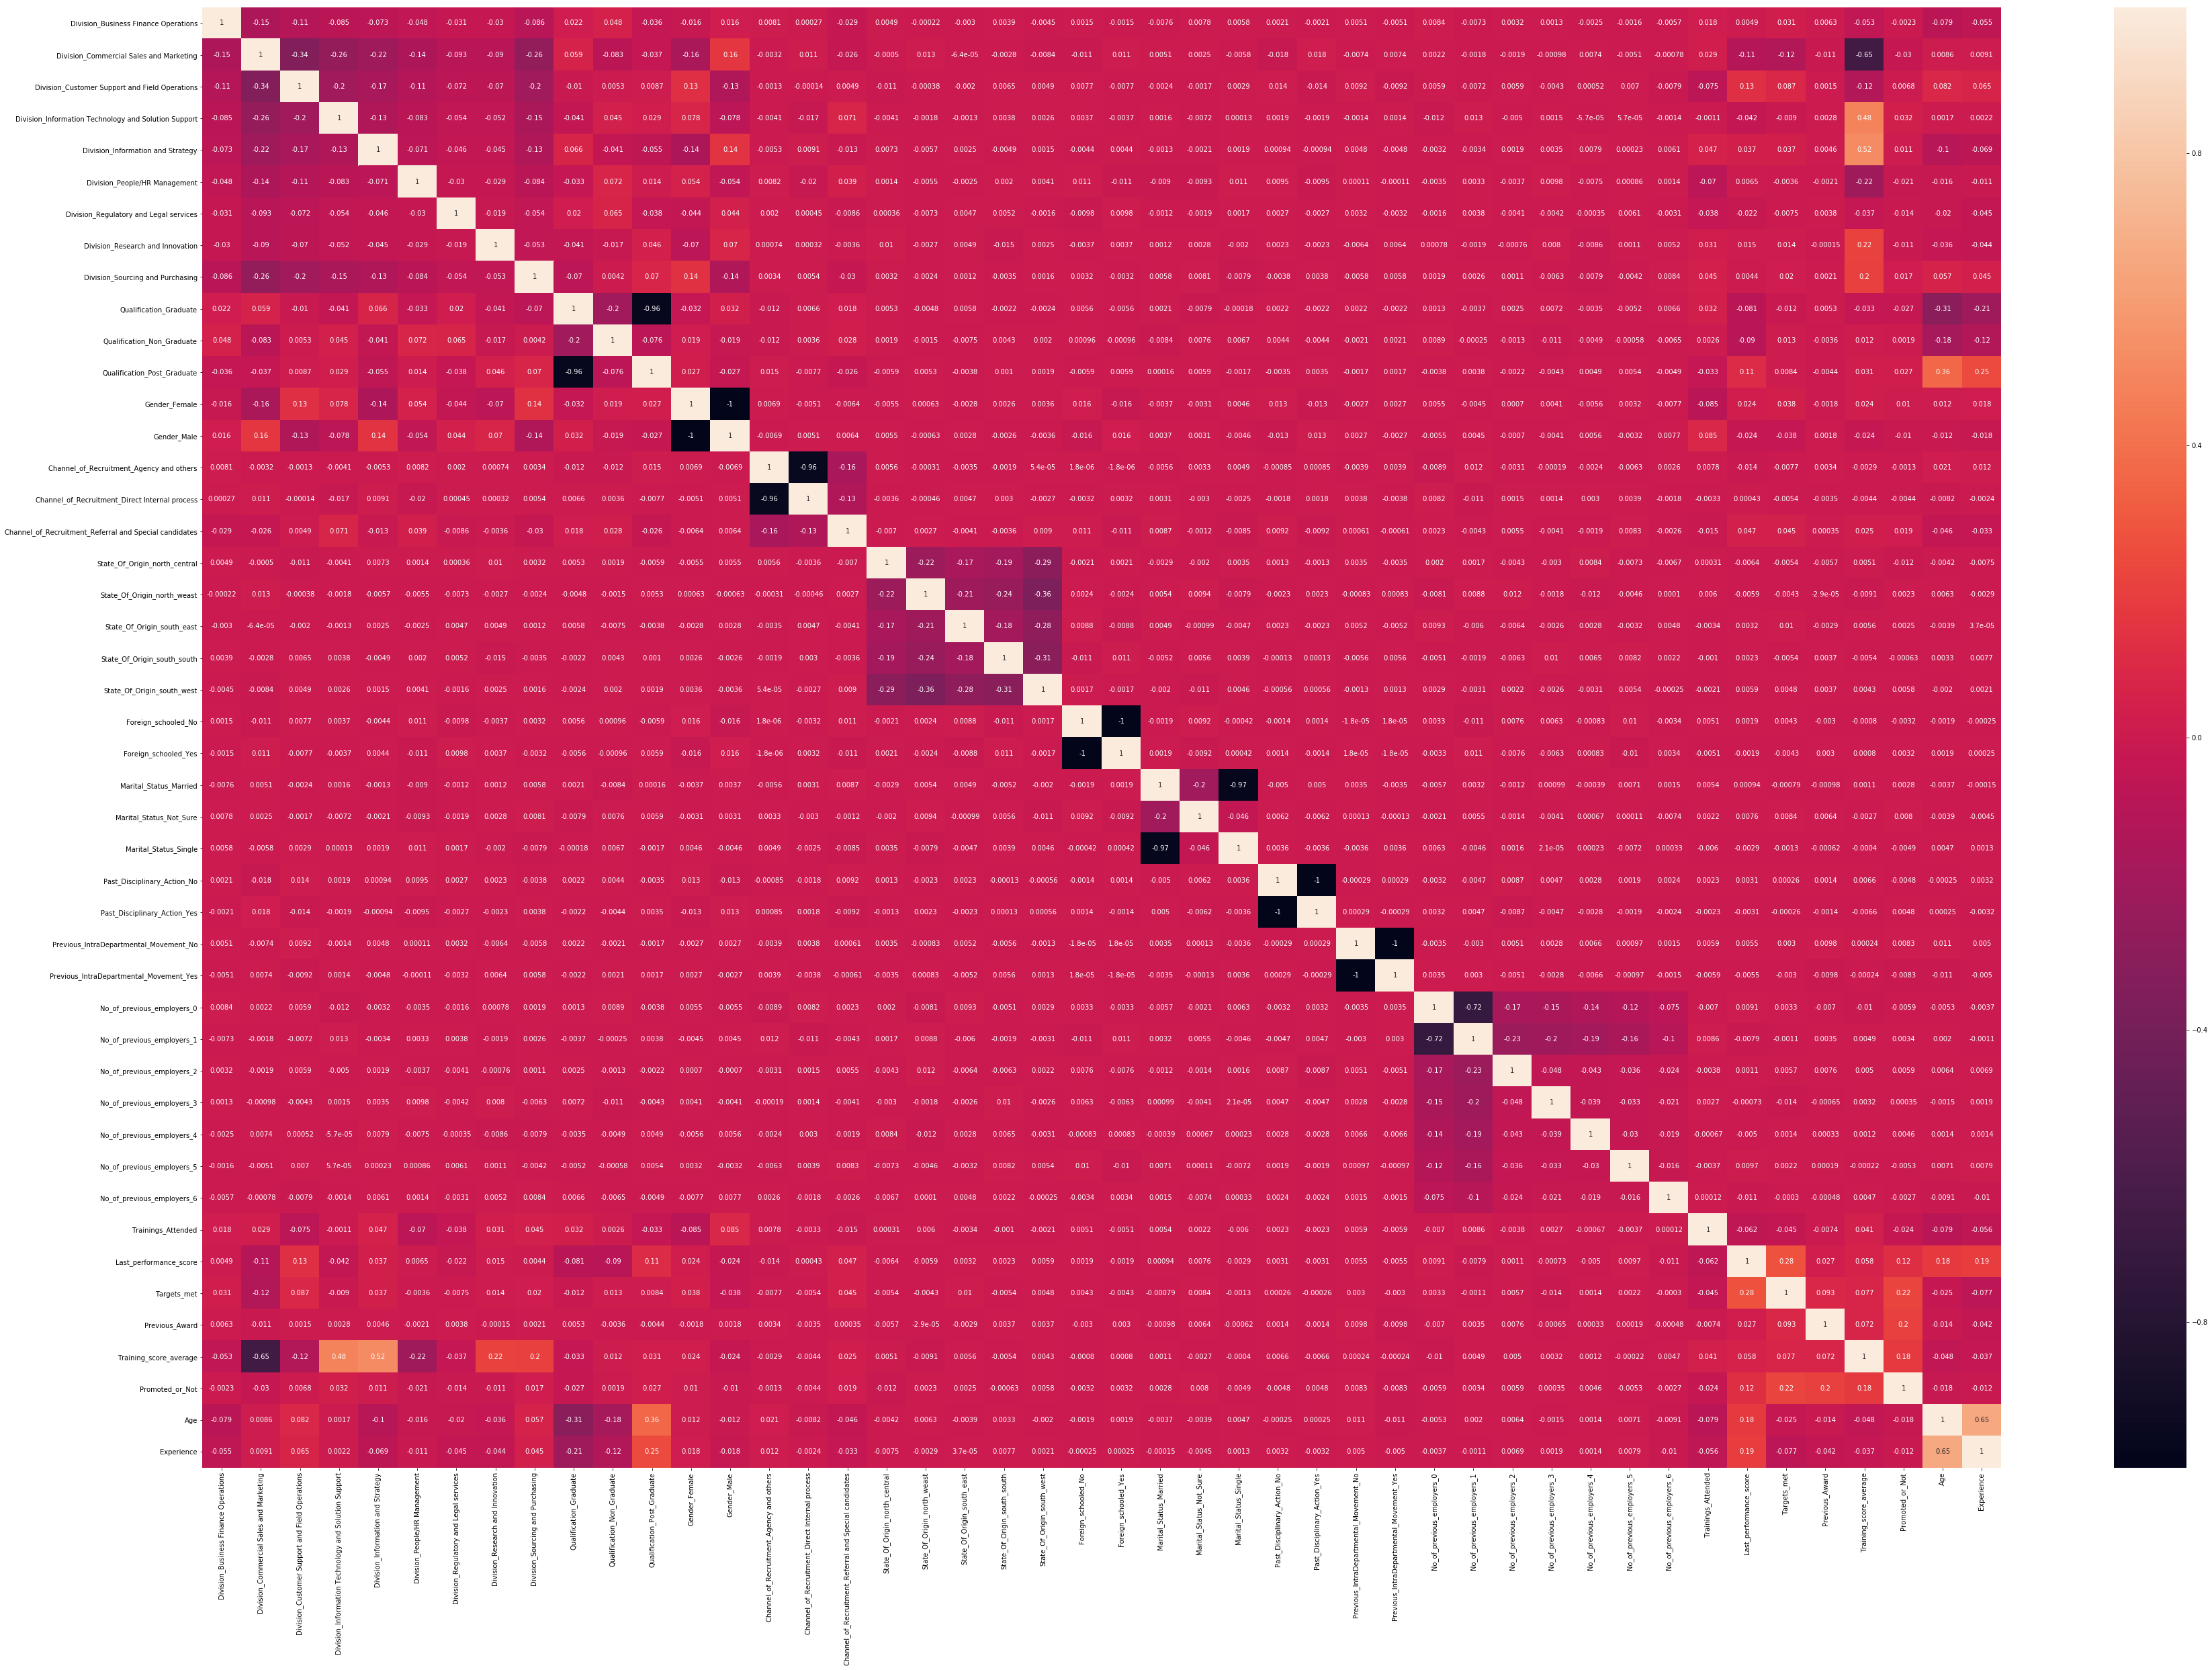

In [57]:
# Visualizing the correlation in the dataset.

plt.figure(figsize=(60,40))
sns.heatmap(training_dataset.corr(), annot=True)

In [58]:
# Defining x and y variables.

x = training_dataset.drop('Promoted_or_Not', axis=1)
y = training_dataset['Promoted_or_Not']

print('shape of x:',x.shape)
print('Shape of y:',y.shape)

shape of x: (38312, 45)
Shape of y: (38312,)


In [59]:
# Using SMOTE to correct data imbalance.

from collections import Counter
from imblearn.over_sampling import SMOTE

# We increase the minority sample(promoted, encoded as 1) from 3241 to 17,000

sm = SMOTE(random_state=42, ratio={1:20000})
x_res,y_res = sm.fit_sample(x,y)
print('Shape of resampled dataset{}'.format(Counter(y_res)))

Shape of resampled datasetCounter({0: 35071, 1: 20000})


In [60]:
# Splitting into train and test sets.

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_res,y_res, test_size=0.30, random_state=0)

In [61]:
# Distinct count of each class in the train set of the target variable (Promoted or not)

Y = pd.DataFrame(y_train)
Y[0].value_counts()

0    24560
1    13989
Name: 0, dtype: int64

In [62]:
# The shapes of our transformed data.

print('Shape of Train variables:', x_train.shape)
print('Shape of Train target:', y_train.shape)
print('Shape of Test set:', x_test.shape)
print('Shape of Test target:', y_test.shape)

Shape of Train variables: (38549, 45)
Shape of Train target: (38549,)
Shape of Test set: (16522, 45)
Shape of Test target: (16522,)


In [63]:
# ALGORITHM 1
# DECISION TREE

In [64]:
# Building the model with all the features included.

# Importing the module.
from sklearn.tree import DecisionTreeClassifier

# Fitting/Training the model.
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train,y_train)

# making predictions.
y_pred = tree.predict(x_test)

In [65]:
# Creating a function for evaluating the model performance.

def evaluation(y_test,y_pred):
    # Model Performance Evaluation.
    from sklearn import metrics

    print('Accuracy: {:.3f}'.format(metrics.accuracy_score(y_test,y_pred)))
    print('F1_score: {:.3f}'.format(metrics.f1_score(y_test,y_pred)))
    print('Frequency of each outcome:')
    prediction = pd.DataFrame(y_pred)
    print(prediction[0].value_counts())

In [66]:
evaluation(y_test,y_pred)

Accuracy: 0.920
F1_score: 0.891
Frequency of each outcome:
0    10406
1     6116
Name: 0, dtype: int64


In [67]:
# AUTOMATIC FEATURE SELECTION.
# 1. Using RFECV

from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

rec = RFECV(estimator=tree, step=1, cv=10, scoring='accuracy')
rec = rec.fit(x_train,y_train)

In [68]:
rec_indices = rec.get_support(indices=True)
col_names = [x.columns[i] for i in rec_indices]

print('Number of selected features:', rec.n_features_)
print('Selected features:\n')
col_names

Number of selected features: 20
Selected features:



['Division_Commercial Sales and Marketing',
 'Division_Customer Support and Field Operations',
 'Division_Information Technology and Solution Support',
 'Division_Sourcing and Purchasing',
 'Qualification_Post_Graduate',
 'Gender_Female',
 'Channel_of_Recruitment_Agency and others',
 'State_Of_Origin_north_weast',
 'State_Of_Origin_south_east',
 'State_Of_Origin_south_south',
 'State_Of_Origin_south_west',
 'No_of_previous_employers_0',
 'No_of_previous_employers_1',
 'Trainings_Attended',
 'Last_performance_score',
 'Targets_met',
 'Previous_Award',
 'Training_score_average',
 'Age',
 'Experience']

In [69]:
# Transforming the train and test sets with respect to the selected RFECV features.

rec_train = rec.transform(x_train)
rec_test = rec.transform(x_test)

In [70]:
# Fitting the model with the RFECV selected features.

tree = DecisionTreeClassifier()
tree.fit(rec_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [71]:
# Predicting the new model.

y_pred = tree.predict(rec_test)

# Evaluation.
evaluation(y_test,y_pred)

Accuracy: 0.921
F1_score: 0.892
Frequency of each outcome:
0    10440
1     6082
Name: 0, dtype: int64


In [72]:
# 2. Automatic Feature selection using SelectKBest

from sklearn.feature_selection import SelectKBest

select = SelectKBest(k = 20)
selected_features = select.fit(x_train,y_train)
selected_features

SelectKBest(k=20, score_func=<function f_classif at 0x000002ABC977A400>)

In [73]:
selected_indices = selected_features.get_support(indices=True)
colnames_select = [x.columns[i] for i in selected_indices]


#Viewing the selected features.
colnames_select

['Division_Commercial Sales and Marketing',
 'Division_Information Technology and Solution Support',
 'Division_Information and Strategy',
 'Division_People/HR Management',
 'Division_Regulatory and Legal services',
 'Division_Research and Innovation',
 'Division_Sourcing and Purchasing',
 'Qualification_Graduate',
 'Qualification_Post_Graduate',
 'Channel_of_Recruitment_Referral and Special candidates',
 'Marital_Status_Single',
 'Previous_IntraDepartmental_Movement_No',
 'Previous_IntraDepartmental_Movement_Yes',
 'Trainings_Attended',
 'Last_performance_score',
 'Targets_met',
 'Previous_Award',
 'Training_score_average',
 'Age',
 'Experience']

In [74]:
# Transforming the train and test sets to include the selected features;

x_train_select = select.transform(x_train)
x_test_select = select.transform(x_test)

print('size of x_train:', x_train.shape)
print('size of x_train_select:', x_train_select.shape)

size of x_train: (38549, 45)
size of x_train_select: (38549, 20)


In [75]:
# Fitting a Decision Tree Classifier to the data;

tree = DecisionTreeClassifier()
tree.fit(x_train_select,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [76]:
# Making Prediction.

y_pred = tree.predict(x_test_select)

# Model Performance Evaluation.
evaluation(y_test,y_pred)

Accuracy: 0.924
F1_score: 0.895
Frequency of each outcome:
0    10495
1     6027
Name: 0, dtype: int64


In [77]:
# ALGORITHM 2.
# RANDOM FOREST CLASSIFIER.

In [78]:
# Building the model with all the features.

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [79]:
# Predicting the model.
pred = forest.predict(x_test)

# Evaluating the model.
evaluation(y_test,y_pred)

Accuracy: 0.924
F1_score: 0.895
Frequency of each outcome:
0    10495
1     6027
Name: 0, dtype: int64


In [80]:
# Applying RFECV

rec = RFECV(estimator=forest, step=1, cv=10, scoring='accuracy')
rec = rec.fit(x_train,y_train)

rec_indices = rec.get_support(indices=True)
col_names = [x.columns[i] for i in rec_indices]

print('Number of selected features:', rec.n_features_)
print('Selected features:\n')
col_names

Number of selected features: 26
Selected features:



['Division_Commercial Sales and Marketing',
 'Division_Customer Support and Field Operations',
 'Division_Information Technology and Solution Support',
 'Division_Information and Strategy',
 'Qualification_Graduate',
 'Qualification_Post_Graduate',
 'Gender_Female',
 'Gender_Male',
 'Channel_of_Recruitment_Agency and others',
 'Channel_of_Recruitment_Direct Internal process',
 'State_Of_Origin_north_central',
 'State_Of_Origin_north_weast',
 'State_Of_Origin_south_east',
 'State_Of_Origin_south_south',
 'State_Of_Origin_south_west',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'No_of_previous_employers_0',
 'No_of_previous_employers_1',
 'Trainings_Attended',
 'Last_performance_score',
 'Targets_met',
 'Previous_Award',
 'Training_score_average',
 'Age',
 'Experience']

In [81]:
# Transforming the train and test sets.

rec_train = rec.transform(x_train)
rec_test = rec.transform(x_test)

In [82]:
# Training the model with the selected features.

forest.fit(rec_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [83]:
# Predicting the new model.
y_pred = forest.predict(rec_test)

# Evaluating the new model.
evaluation(y_test,y_pred)

Accuracy: 0.945
F1_score: 0.920
Frequency of each outcome:
0    11148
1     5374
Name: 0, dtype: int64


In [84]:
# Applying SelectKBest

In [85]:
# Creating a function to define SelectKBest.

def Select(m):
    
    #Automatic Feature selection using SelectKBest
    from sklearn.feature_selection import SelectKBest

    select = SelectKBest(k = m)
    selected_features = select.fit(x_train,y_train)
    selected_features

    selected_indices = selected_features.get_support(indices=True)
    colnames_select = [x.columns[i] for i in selected_indices]

    # Transforming the train and test sets to include the selected features;

    x_train_select = select.transform(x_train)
    x_test_select = select.transform(x_test)

    print('size of x_train:', x_train.shape)
    print('size of x_train_select:', x_train_select.shape)

    #Viewing the selected features.
    print('\nSelected Features:\n',colnames_select)

In [86]:
# Applying SelectKBest, k=20.

Select(20)

size of x_train: (38549, 45)
size of x_train_select: (38549, 20)

Selected Features:
 ['Division_Commercial Sales and Marketing', 'Division_Information Technology and Solution Support', 'Division_Information and Strategy', 'Division_People/HR Management', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Qualification_Graduate', 'Qualification_Post_Graduate', 'Channel_of_Recruitment_Referral and Special candidates', 'Marital_Status_Single', 'Previous_IntraDepartmental_Movement_No', 'Previous_IntraDepartmental_Movement_Yes', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Age', 'Experience']


In [87]:
# Fitting the model with features selected via SelectKBest.

forest.fit(x_train_select,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [88]:
# Predicting the new model.

y_pred = forest.predict(x_test_select)

# Evaluating the new model.

evaluation(y_test,y_pred)

Accuracy: 0.943
F1_score: 0.918
Frequency of each outcome:
0    10993
1     5529
Name: 0, dtype: int64


In [89]:
# Using RFECV provided better Accuracy and F1 score.

In [90]:
# Creating a function for applying RFECV.

def recursive(model):
    
    from sklearn.feature_selection import RFE, RFECV
    rec = RFECV(estimator=model, step=1, cv=10, scoring='accuracy')
    rec = rec.fit(x_train,y_train)

    rec_indices = rec.get_support(indices=True)
    col_names = [x.columns[i] for i in rec_indices]

    # Transforming the train and test sets with respect to the selected RFECV features.

    rec_train = rec.transform(x_train)
    rec_test = rec.transform(x_test)
    
    print('Number of selected features:', rec.n_features_)
    print('Selected features:\n')
    print(col_names)

In [91]:
# ALGORITHM 3
# GRADIENT BOOST

In [92]:
# Training the model with all the features.

grb = GradientBoostingClassifier()
grb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
# Predicting the model.
y_pred = grb.predict(x_test)

# Evaluating the model.
evaluation(y_test,y_pred)

Accuracy: 0.945
F1_score: 0.919
Frequency of each outcome:
0    11390
1     5132
Name: 0, dtype: int64


In [115]:
# Feature selection using RFECV

recursive(grb)

Number of selected features: 25
Selected features:

['Division_Commercial Sales and Marketing', 'Division_Customer Support and Field Operations', 'Division_Information and Strategy', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Qualification_Graduate', 'Gender_Female', 'Gender_Male', 'Channel_of_Recruitment_Agency and others', 'Channel_of_Recruitment_Direct Internal process', 'State_Of_Origin_north_central', 'State_Of_Origin_north_weast', 'State_Of_Origin_south_east', 'State_Of_Origin_south_south', 'State_Of_Origin_south_west', 'Foreign_schooled_No', 'Marital_Status_Married', 'Previous_IntraDepartmental_Movement_No', 'No_of_previous_employers_0', 'No_of_previous_employers_1', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average']


In [94]:
# Fitting the new model.

grb.fit(rec_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [95]:
# Predicting the new model.

y_pred = grb.predict(rec_test)

# Evaluating the model.

evaluation(y_test,y_pred)

Accuracy: 0.945
F1_score: 0.919
Frequency of each outcome:
0    11376
1     5146
Name: 0, dtype: int64


In [96]:
# Feature Selection using SelectKBest

Select(20)

size of x_train: (38549, 45)
size of x_train_select: (38549, 20)

Selected Features:
 ['Division_Commercial Sales and Marketing', 'Division_Information Technology and Solution Support', 'Division_Information and Strategy', 'Division_People/HR Management', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Qualification_Graduate', 'Qualification_Post_Graduate', 'Channel_of_Recruitment_Referral and Special candidates', 'Marital_Status_Single', 'Previous_IntraDepartmental_Movement_No', 'Previous_IntraDepartmental_Movement_Yes', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Age', 'Experience']


In [97]:
# Fitting the model with features selected via SelectKBest.

grb.fit(x_train_select,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [98]:
# Predicting the new model.

y_pred = grb.predict(x_test_select)

# Evaluating the new model.

evaluation(y_test,y_pred)

Accuracy: 0.912
F1_score: 0.866
Frequency of each outcome:
0    11703
1     4819
Name: 0, dtype: int64


In [99]:
# ALGORITHM 4
# ADA BOOST

In [100]:
# Training the model with all the features.

ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [101]:
# Model Prediction.

y_pred = ada.predict(x_test)

# Model Evaluation.

evaluation(y_test,y_pred)

Accuracy: 0.917
F1_score: 0.877
Frequency of each outcome:
0    11302
1     5220
Name: 0, dtype: int64


In [123]:
# Applying RFECV.

recursive(ada)

Number of selected features: 21
Selected features:

['Division_Business Finance Operations', 'Division_Commercial Sales and Marketing', 'Division_Customer Support and Field Operations', 'Division_People/HR Management', 'Channel_of_Recruitment_Agency and others', 'Channel_of_Recruitment_Direct Internal process', 'Channel_of_Recruitment_Referral and Special candidates', 'State_Of_Origin_north_central', 'State_Of_Origin_north_weast', 'State_Of_Origin_south_east', 'State_Of_Origin_south_south', 'State_Of_Origin_south_west', 'Marital_Status_Married', 'Marital_Status_Single', 'No_of_previous_employers_0', 'No_of_previous_employers_1', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average']


In [102]:
# Training/fitting the model with RFECV selected features.

ada.fit(rec_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [103]:
# Predicting the new model.

y_pred = ada.predict(rec_test)

# Evaluating the new model.

evaluation(y_test,y_pred)

Accuracy: 0.917
F1_score: 0.878
Frequency of each outcome:
0    11326
1     5196
Name: 0, dtype: int64


In [104]:
# Fitting the model using features selected through SelectKBest.

ada.fit(x_train_select,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [105]:
# New model prediction.

y_pred = ada.predict(x_test_select)

# Evaluating the new model.

evaluation(y_test,y_pred)

Accuracy: 0.870
F1_score: 0.806
Frequency of each outcome:
0    11454
1     5068
Name: 0, dtype: int64


In [106]:
# ALGORITHM 5
# XGBOOST

In [107]:
from xgboost import XGBClassifier

# Fitting xgboost using all the features.

xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [108]:
# Model Prediction.

y_pred = xgb.predict(x_test)

# Model evaluation.

evaluation(y_test,y_pred)

Accuracy: 0.944
F1_score: 0.916
Frequency of each outcome:
0    11414
1     5108
Name: 0, dtype: int64


In [109]:
xgb.feature_importances_

array([0.01106678, 0.02946008, 0.02907571, 0.        , 0.00639565,
       0.        , 0.        , 0.0042753 , 0.01875906, 0.01430038,
       0.        , 0.00691878, 0.03155525, 0.        , 0.02586126,
       0.11384585, 0.        , 0.07260478, 0.04307218, 0.04205173,
       0.02139722, 0.06591863, 0.02221451, 0.        , 0.07290671,
       0.        , 0.01772325, 0.        , 0.        , 0.02542459,
       0.        , 0.05563923, 0.05090191, 0.        , 0.00111778,
       0.00044487, 0.        , 0.        , 0.03777783, 0.01728277,
       0.10347539, 0.03563261, 0.01810933, 0.00344469, 0.00134579],
      dtype=float32)

In [110]:
# Applying SelectKBest

Select(20)

size of x_train: (38549, 45)
size of x_train_select: (38549, 20)

Selected Features:
 ['Division_Commercial Sales and Marketing', 'Division_Information Technology and Solution Support', 'Division_Information and Strategy', 'Division_People/HR Management', 'Division_Regulatory and Legal services', 'Division_Research and Innovation', 'Division_Sourcing and Purchasing', 'Qualification_Graduate', 'Qualification_Post_Graduate', 'Channel_of_Recruitment_Referral and Special candidates', 'Marital_Status_Single', 'Previous_IntraDepartmental_Movement_No', 'Previous_IntraDepartmental_Movement_Yes', 'Trainings_Attended', 'Last_performance_score', 'Targets_met', 'Previous_Award', 'Training_score_average', 'Age', 'Experience']


In [111]:
# Fitting the model on SelectKBest selected features.

xgb.fit(x_train_select,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [112]:
# Predicting the new model.

y_pred = xgb.predict(x_test_select)

# Evaluating the new model.

evaluation(y_test,y_pred)

Accuracy: 0.906
F1_score: 0.856
Frequency of each outcome:
0    11818
1     4704
Name: 0, dtype: int64


In [ ]:
# Random Forest had the highest Accuracy and F1 score.
# It will therefore be used to predict the test data.

In [ ]:
# HYPER-PARAMETER TUNING.

In [180]:
tforest = RandomForestClassifier(n_estimators=300,  max_depth=15, random_state=0, max_features=15)
tforest.fit(rec_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=15, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [181]:
y_pred = tforest.predict(rec_test)

print('Train accuracy: {:.2f} '.format(tforest.score(rec_train,y_train)*100))
print('Test accuracy: {:.2f} '.format(tforest.score(rec_test,y_test)*100))
print('\n')
evaluation(y_test,y_pred)

Train accuracy: 96.30 
Test accuracy: 94.95 


Accuracy: 0.950
F1_score: 0.926
Frequency of each outcome:
0    11271
1     5251
Name: 0, dtype: int64


In [182]:
# Based on the performance scores of each algorithm, Random Forest Classifier will be used to predict the test dataset since it has the highest f1 score.

In [183]:
# THE TEST DATASET.

In [184]:
# Importing the test dataset.

test = pd.read_csv('C:\\Users\\hp\\Desktop\\IntercampusAI\\test.csv')
test.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1


In [185]:
# Test data info.
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          15766 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

In [186]:
# Grouping characters in the Qualification column.

test.loc[test['Qualification'] == 'First Degree or HND', 'Qualification'] = 'Graduate'
test.loc[test['Qualification'] == 'MSc, MBA and PhD', 'Qualification'] = 'Post_Graduate'
test.loc[test['Qualification'] == 'Non-University Education', 'Qualification'] = 'Non_Graduate'

In [187]:
# Checking for unique characters in the Qualification column. 

test.Qualification.unique()

array(['Graduate', nan, 'Post_Graduate', 'Non_Graduate'], dtype=object)

In [188]:
# Replacing 'nan' with an editable character ('not_specified)

test.Qualification = test.Qualification.map(replace_most_common)
print(test.Qualification.isnull().sum())
test.Qualification.unique()

0


array(['Graduate', 'not-specified', 'Post_Graduate', 'Non_Graduate'],
      dtype=object)

In [189]:
# Assigning the edited missing values('not-specified') to the character with the highest frequency (Graduate)

test.Qualification.replace({'not-specified':'Graduate'}, inplace=True)
print(test.Qualification.unique())
test.Qualification.value_counts()

['Graduate' 'Post_Graduate' 'Non_Graduate']


Graduate         11821
Post_Graduate     4456
Non_Graduate       219
Name: Qualification, dtype: int64

In [190]:
# Distinct values in the "Division" column.

test.Division.value_counts()

Commercial Sales and Marketing                 5145
Customer Support and Field Operations          3375
Information Technology and Solution Support    2186
Sourcing and Purchasing                        2086
Information and Strategy                       1631
Business Finance Operations                     750
People/HR Management                            714
Regulatory and Legal services                   306
Research and Innovation                         303
Name: Division, dtype: int64

In [191]:
# Grouping state of origin into geo-political zones.

test.State_Of_Origin = test.State_Of_Origin.map(state)
test.State_Of_Origin.value_counts()

south_west       5394
north_weast      3526
south_south      2717
north_central    2524
south_east       2335
Name: State_Of_Origin, dtype: int64

In [192]:
test.head(2)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,Graduate,Male,Agency and others,2,1976,7.5,2017,0,0,65,north_central,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,Graduate,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,south_west,Yes,Married,No,No,1


In [193]:
# Inspecting the 'No of previous employers' column.

test.No_of_previous_employers.unique()

array(['1', '0', '2', '5', '3', 'More than 5', '4'], dtype=object)

In [194]:
# Correcting the data type anomaly.

test.No_of_previous_employers.replace({'More than 5':'6'}, inplace=True)
test.No_of_previous_employers.value_counts()

1    8060
0    5871
2     817
3     652
4     540
5     400
6     156
Name: No_of_previous_employers, dtype: int64

In [195]:
# Extracting all Categorical features in the test data.

test_cat = test.select_dtypes(include=['object'])
test_cat.head(3)

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,Graduate,Male,Agency and others,north_central,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,Graduate,Male,Direct Internal process,south_west,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,Post_Graduate,Male,Direct Internal process,north_weast,Yes,Married,No,No,1


In [196]:
# Removing EmployeeNo from the cat_data.

Employ_cat = test_cat.pop('EmployeeNo')
Employ_cat.head(3)

0    YAK/S/00005
1    YAK/S/00011
2    YAK/S/00015
Name: EmployeeNo, dtype: object

In [197]:
# Extracting all Numerical features in the test data.

test_num = test.select_dtypes(exclude=['object'])
test_num.head(3)

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average
0,2,1976,7.5,2017,0,0,65
1,2,1991,0.0,2018,0,0,69
2,2,1984,7.5,2012,0,0,76


In [198]:
# Encoding the categorical features in the test data.

encoded_cat = pd.get_dummies(test_cat)
encoded_cat.head(3)

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_Graduate,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_6
0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [199]:
# Concatenating the sub-grouped test data

test_data = pd.concat([Employ_cat, encoded_cat, test_num], axis=1)
test_data.head(3)

,EmployeeNo,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,...,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_6,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average
0,YAK/S/00005,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1976,7.5,2017,0,0,65
1,YAK/S/00011,0,0,0,1,0,0,0,0,0,...,0,0,0,2,1991,0.0,2018,0,0,69
2,YAK/S/00015,0,0,0,0,0,0,0,1,0,...,0,0,0,2,1984,7.5,2012,0,0,76


In [204]:
# Creating new features: 'Age' and 'Experience' from 'Year of birth' and 'Year of recruitment'.

test_data['Age'] = 2019 - test_data['Year_of_birth']

test_data['Experience'] = 2019 - test_data['Year_of_recruitment']

In [206]:
# Dropping 'Year of birth' and 'Year of recruitment' columns.

test_data = test_data.drop('Year_of_birth', axis=1)
test_data = test_data.drop('Year_of_recruitment', axis=1)

In [207]:
test_data.head(2)

,EmployeeNo,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,...,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_6,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Experience
0,YAK/S/00005,0,0,0,1,0,0,0,0,0,...,0,0,0,2,7.5,0,0,65,43,2
1,YAK/S/00011,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0.0,0,0,69,28,1


In [217]:
# Defining the test data for prediction.

testing = test_data.iloc[:, 1:46]
testing.shape

(16496, 45)

In [218]:
'Experience' in testing

True

In [219]:
'Age' in testing

True

In [222]:
testing.columns[44]

'Experience'

In [221]:
# Creating a test dataset consisting of the automatically selected features.

test_selected_data = pd.DataFrame({'Division_Commercial Sales and Marketing':testing['Division_Commercial Sales and Marketing'], 'Division_Customer Support and Field Operations':testing['Division_Customer Support and Field Operations'], 'Division_Information Technology and Solution Support':testing['Division_Information Technology and Solution Support'], 'Division_Information and Strategy':testing['Division_Information and Strategy'], 'Qualification_Graduate':testing['Qualification_Graduate'], 'Qualification_Post_Graduate':testing['Qualification_Post_Graduate'], 'Gender_Female':testing['Gender_Female'], 'Gender_Male':testing['Gender_Male'], 'Channel_of_Recruitment_Agency and others':testing['Channel_of_Recruitment_Agency and others'], 'Channel_of_Recruitment_Direct Internal process':testing['Channel_of_Recruitment_Direct Internal process'], 'State_Of_Origin_north_central':testing['State_Of_Origin_north_central'], 'State_Of_Origin_north_weast':testing['State_Of_Origin_north_weast'], 'State_Of_Origin_south_east':testing['State_Of_Origin_south_east'], 'State_Of_Origin_south_south':testing['State_Of_Origin_south_south'], 'State_Of_Origin_south_west':testing['State_Of_Origin_south_west'], 'Marital_Status_Married':testing['Marital_Status_Married'], 'Marital_Status_Single':testing['Marital_Status_Single'], 'No_of_previous_employers_0':testing['No_of_previous_employers_0'], 'No_of_previous_employers_1':testing['No_of_previous_employers_1'], 'Trainings_Attended':testing['Trainings_Attended'], 'Last_performance_score':testing['Last_performance_score'], 'Targets_met':testing['Targets_met'], 'Previous_Award':testing['Previous_Award'], 'Training_score_average':testing['Training_score_average'], 'Age':testing['Age'], 'Experience':testing['Experience']})

print(test_selected_data.shape)
test_selected_data.head(3)

(16496, 26)


,Age,Channel_of_Recruitment_Agency and others,Channel_of_Recruitment_Direct Internal process,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Experience,Gender_Female,Gender_Male,...,Qualification_Graduate,Qualification_Post_Graduate,State_Of_Origin_north_central,State_Of_Origin_north_weast,State_Of_Origin_south_east,State_Of_Origin_south_south,State_Of_Origin_south_west,Targets_met,Training_score_average,Trainings_Attended
0,43,1,0,0,0,1,0,2,0,1,...,1,0,1,0,0,0,0,0,65,2
1,28,0,1,0,0,1,0,1,0,1,...,1,0,0,0,0,0,1,0,69,2
2,35,0,1,0,0,0,0,7,0,1,...,0,1,0,1,0,0,0,0,76,2


In [226]:
# Predicting the test data.

pred = tforest.predict(test_selected_data)

In [227]:
# PREPARING SUBMISSION FILE.

In [228]:
Submission = pd.DataFrame({'EmployeeNo':test_data['EmployeeNo'], 'Promoted_or_Not':pred})
print('Top Ten \n', Submission.head(10), '\n\n Bottom Ten \n', Submission.tail(10))

Top Ten 
     EmployeeNo  Promoted_or_Not
0  YAK/S/00005                0
1  YAK/S/00011                0
2  YAK/S/00015                0
3  YAK/S/00016                0
4  YAK/S/00017                0
5  YAK/S/00019                0
6  YAK/S/00027                0
7  YAK/S/00028                0
8  YAK/S/00031                0
9  YAK/S/00032                0 

 Bottom Ten 
         EmployeeNo  Promoted_or_Not
16486  YAK/S/54784                0
16487  YAK/S/54785                0
16488  YAK/S/54787                0
16489  YAK/S/54792                0
16490  YAK/S/54795                0
16491  YAK/S/54797                0
16492  YAK/S/54798                0
16493  YAK/S/54800                0
16494  YAK/S/54803                0
16495  YAK/S/54804                0


In [229]:
# Checking for the frequency of the predictions.

Submission.Promoted_or_Not.value_counts()

0    16496
Name: Promoted_or_Not, dtype: int64

In [230]:
# Creating a csv file to store the prediction.

Filename = 'Staff Promotion Algorithm by Jahfaith Irokanulo.csv'
Submission.to_csv(Filename, index=False)